In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# community detection

G = nx.karate_club_graph()

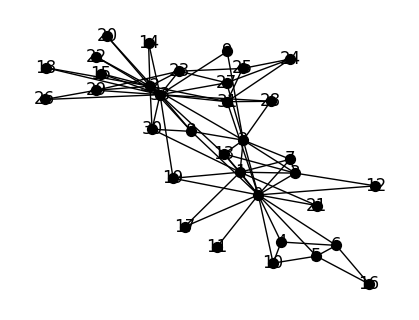

In [17]:
plt.figure(figsize=(4,3))
nx.draw_spring(G, node_color="black", node_size = 50, labels = {i: i for i in G.nodes()})


In [47]:
faction1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
faction2 = [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# THIS IS A PARTITION
communities = [faction1, faction2]
colours = ['red', 'cyan']

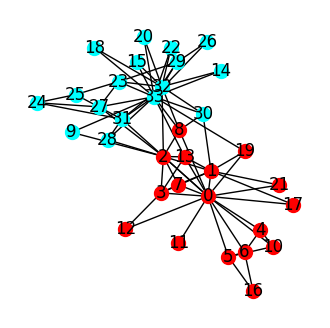

In [48]:
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=pos)
for c, colour in zip(communities, colours):
    nx.draw_networkx_nodes(G, pos = pos, nodelist=c, node_color=colour, node_size=100)
nx.draw_networkx_labels(G, pos=pos)
plt.axis('off');

In [49]:
def find_best_edge(G):
    # find the node with the highest betweenness centrality
    eb = nx.edge_betweenness_centrality(G)
    return max(eb.keys(), key = lambda e: eb[e])

def girvan_newman(G):
    G = G.copy()

    # keep track of removed edges (so I can plot them)
    removed_edges = []
    while nx.number_connected_components(G) == 1:
        u, v, = find_best_edge(G)
        G.remove_edge(u, v)
        removed_edges.append((u, v))

    communities = list(nx.connected_components(G))
    
    return communities, removed_edges

In [50]:
commnities, removed_edges = girvan_newman(G)

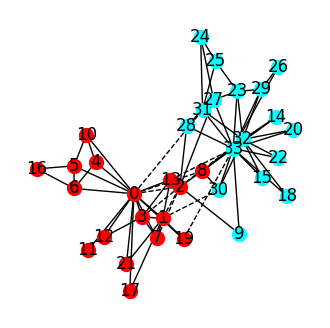

In [51]:
other_edges = set(G.edges()) - set(removed_edges)

plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, edgelist=other_edges, pos=pos)
nx.draw_networkx_edges(G, edgelist=removed_edges, pos=pos, style='dashed')

for c, colour in zip(communities, colours):
    nx.draw_networkx_nodes(G, pos = pos, nodelist=c, node_color=colour, node_size=100)
nx.draw_networkx_labels(G, pos=pos)
plt.axis('off');

In [52]:
nx.community.modularity(G, communities)

0.39143756676224206

In [56]:
communities_greedy = nx.community.greedy_modularity_communities(G)
for c in communities_greedy:
    print(c)
nx.community.modularity(G, communities_greedy)

frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
frozenset({0, 16, 19, 4, 5, 6, 10, 11})


0.4109649369389629

# FOOTBALL

In [58]:
G = nx.read_gml("football.gml")

In [59]:
print(f"Number of teams: {len(G)}")
print(f"Number of edges: {G.size()}")


Number of teams: 115
Number of edges: 613


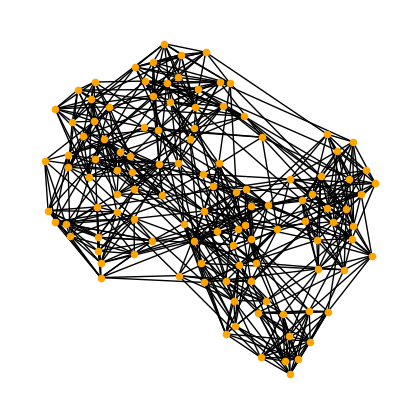

In [63]:
plt.figure(figsize=(4,4))
nx.draw_spring(G, node_size = 20, node_color = "orange")

In [72]:
communities = nx.community.louvain_communities(G)
colours = ['red', 'lightgreen', 'blue', 'yellow', 'cyan', 'magenta', 'lightblue', 'pink', 'mediumseagreen', 'orance']

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'orance'

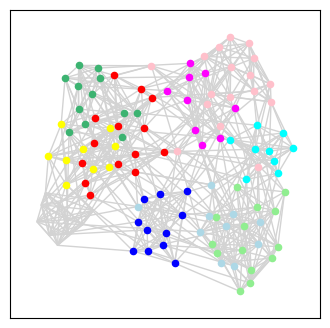

In [73]:
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=pos, edge_color = 'lightgrey')
for c, colour in zip(communities, colours):
    nx.draw_networkx_nodes(G, pos = pos, nodelist=c, node_color=colour, node_size=20)
# nx.draw_networkx_labels(G, pos=pos)
plt.axis('off');

In [71]:
nx.community.modularity(G, communities)

0.6045695626834571